In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Track data loading
import psutil
import time

# Save&Load results
import pickle

In [2]:
import networkx as nx

import pandas as pd
import seaborn as sns

# 1. Load Data

In [3]:
st = time.time()

with open("data/graphs/G_filtered.gpickle", 'rb') as f:
    G_filtered = pickle.load(f)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.5021933436393737 mins
RAM memory % used: 6.2
RAM Used (GB): 22.437511168


# 2. Edge Categorising - Generalisation

In [4]:
newsCategory_dict = nx.get_edge_attributes(G_filtered, 'newsCategories')

In [5]:
newsCategory = ['CLICKBAIT', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX', 'MSM', 'NA', 'OTHER', 'POLITICAL', 'SATIRE', 'SCIENCE', 'SHADOW']
newsCateogry_dict_decode = {i:newsCategory[i] for i in range(len(newsCategory))}

- factual

In [6]:
newsCategory[3], newsCategory[8]

('MSM', 'SCIENCE')

- misleading

In [7]:
newsCategory[0], newsCategory[1], newsCategory[2]

('CLICKBAIT', 'CONSPIRACY/JUNKSCI', 'FAKE/HOAX')

- uncertain

In [8]:
newsCategory[4], newsCategory[5], newsCategory[6], newsCategory[7], newsCategory[9]

('NA', 'OTHER', 'POLITICAL', 'SATIRE', 'SHADOW')

In [9]:
newsCateogry_dict_generalised_code = {3: 0,  # factual
                                      8: 0,
                                      0: 1,  # misleading
                                      1: 1,
                                      2: 1,
                                      4: 2,  # undecided
                                      5: 2,
                                      6: 2, 
                                      7: 2,
                                      9: 2,
                                     }

In [10]:
st = time.time()

newsCategory_dict_generalised = {}

for k,v in newsCategory_dict.items():
    generalised_v = np.array([newsCateogry_dict_generalised_code[element] for element in v])
    newsCategory_dict_generalised.update({k: generalised_v})

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.2089928388595581 mins
RAM memory % used: 6.1
RAM Used (GB): 21.99465984


- Save

In [11]:
nx.set_edge_attributes(G_filtered, newsCategory_dict_generalised, "newsCategoriesGeneralised")

save_address = "data/graphs/G_aggregated_filtered.gpickle"
with open(save_address, 'wb') as pickle_file:
    pickle.dump(G_filtered, pickle_file)

In [11]:
G_filtered.edges[(2, 1480708)] # example

{'weight': 5,
 'timeStamps': array([1663896188, 1664904542, 1664904658, 1670264155, 1670264298]),
 'newsCategories': array([4, 3, 8, 8, 4]),
 'newsCategoriesGeneralised': array([2, 0, 0, 0, 2])}

## 2.1. Percentage of scientific, fake, uncertain retweets

In [12]:
all_newsCategoriesGeneralised = np.concatenate(np.array(list(newsCategory_dict_generalised.values())), axis = None)

In [13]:
len(all_newsCategoriesGeneralised)

29991328

- factual

In [14]:
np.sum(all_newsCategoriesGeneralised == 0), np.sum(all_newsCategoriesGeneralised == 0)/len(all_newsCategoriesGeneralised)

(10762460, 0.3588523989334517)

- misleading

In [15]:
np.sum(all_newsCategoriesGeneralised == 1), np.sum(all_newsCategoriesGeneralised == 1)/len(all_newsCategoriesGeneralised)

(2367410, 0.0789364845731406)

- uncertain

In [16]:
np.sum(all_newsCategoriesGeneralised == 2), np.sum(all_newsCategoriesGeneralised == 2)/len(all_newsCategoriesGeneralised)

(16861458, 0.5622111164934077)

# 3. Node Categorising

- factual, misleading, and uncertain news per user creates/consumes

In [17]:
node_newsCategoriesGeneralised = {}

In [18]:
st = time.time()

for node in list(G_filtered.nodes):
    in_newsCategoriesGeneralised = np.array([])
    out_newsCategoriesGeneralised = np.array([])
    
    for edge in list(G_filtered.in_edges(node)):
        in_newsCategoriesGeneralised = np.concatenate((in_newsCategoriesGeneralised, G_filtered.edges[edge]['newsCategoriesGeneralised']), axis=None)
    for edge in list(G_filtered.out_edges(node)):
        out_newsCategoriesGeneralised = np.concatenate((out_newsCategoriesGeneralised, G_filtered.edges[edge]['newsCategoriesGeneralised']), axis=None)
    
    newsCategoriesGeneralised = np.concatenate((in_newsCategoriesGeneralised, out_newsCategoriesGeneralised), axis=None)
    node_newsCategoriesGeneralised.update({node: newsCategoriesGeneralised})

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.6537266572316487 mins
RAM memory % used: 6.4
RAM Used (GB): 22.841520128


- Percentage of factual, misleading, and uncertain news per user creates/consumes

In [19]:
node_CateogoriesPercent = {}

In [20]:
st = time.time()

for node in list(G_filtered.nodes):
    news_arr = node_newsCategoriesGeneralised[node] 
    percent_arr = np.array([np.sum(news_arr == i) for i in range(3)]) / len(news_arr)
    node_CateogoriesPercent.update({node: percent_arr})

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.34956877628962196 mins
RAM memory % used: 6.2
RAM Used (GB): 22.25676288


## 3.1. Individual Histogram

In [21]:
colour_palette = {"factual":"#2a9d8f", "misleading":"#e76f51", "uncertain":"#e9c46a"}

- factual

In [22]:
# Number of users involved
np.sum(np.array(list(node_CateogoriesPercent.values()))[:, 0] > 0)

514410

0.3300389573473419 [0.         0.23333333 0.57791949]


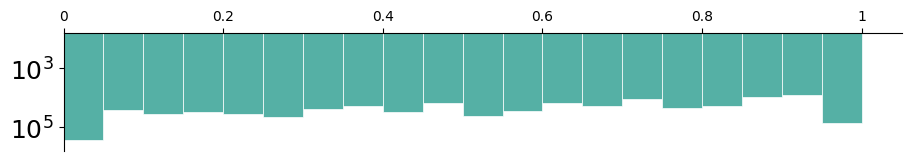

In [23]:
fig, axs = plt.subplots(figsize = (9,1.5), constrained_layout = True)

data = np.array(list(node_CateogoriesPercent.values()))[:, 0]
print(np.average(data), np.quantile(data, [0.25, 0.5, 0.75]))
sns.histplot(data, color=colour_palette["factual"], fill=True, alpha=.8, bins = 20, linewidth = 0.5, edgecolor = 'white')
plt.ylabel('')
plt.yscale('log')
plt.yticks(fontsize = 18)

axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "0.2", "0.4", "0.6", "0.8", "1"])

plt.yticks([10**3, 10**5], [r"$10^3$", r"$10^5$"])
plt.xlim(0, 1.05)
plt.ylim(10**1.8, 10**5.8)

axs.xaxis.tick_top()
plt.gca().invert_yaxis()

- fake

In [24]:
# Number of users involved
np.sum(np.array(list(node_CateogoriesPercent.values()))[:, 1] > 0)

237238

0.0838190329608072 [0.         0.         0.05882353]


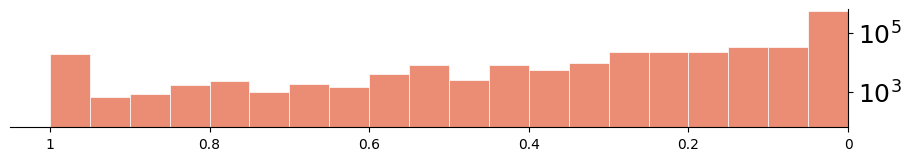

In [25]:
fig, axs = plt.subplots(figsize = (9,1.5), constrained_layout = True)

data = np.array(list(node_CateogoriesPercent.values()))[:, 1]
print(np.average(data), np.quantile(data, [0.25, 0.5, 0.75]))
sns.histplot(data, color=colour_palette["misleading"], fill=True, alpha=.8, bins = 20, linewidth = 0.5, edgecolor = 'white')
plt.ylabel('')
plt.yscale('log')

axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "0.2", "0.4", "0.6", "0.8", "1"])

plt.yticks([10**3, 10**5], [r"$10^3$", r"$10^5$"], fontsize = 18)
plt.xlim(0, 1.05)
plt.ylim(10**1.8, 10**5.8)

axs.yaxis.tick_right()
plt.gca().invert_xaxis()

- uncertain

In [26]:
# Number of users involved
np.sum(np.array(list(node_CateogoriesPercent.values()))[:, 2] > 0)

674234

0.5861420096918507 [0.30909091 0.6        1.        ]


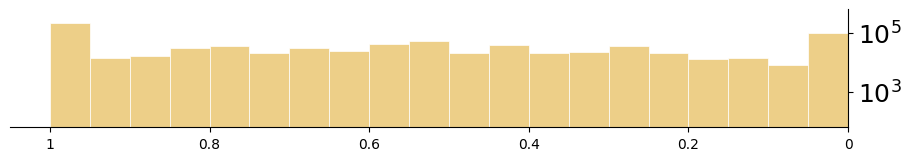

In [27]:
fig, axs = plt.subplots(figsize = (9,1.5), constrained_layout = True)

data = np.array(list(node_CateogoriesPercent.values()))[:, 2]
print(np.average(data), np.quantile(data, [0.25, 0.5, 0.75]))
sns.histplot(data, color=colour_palette["uncertain"], fill=True, alpha=.8, bins = 20, linewidth = 0.5, edgecolor = 'white')
plt.ylabel('')
plt.yscale('log')

axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0", "0.2", "0.4", "0.6", "0.8", "1"])

plt.yticks([10**3, 10**5], [r"$10^3$", r"$10^5$"], fontsize = 18)
plt.xlim(0, 1.05)
plt.ylim(10**1.8, 10**5.8)

axs.yaxis.tick_right()
plt.gca().invert_xaxis()

## 3.2. Joint Distribution

In [28]:
xyz = np.array(list(node_CateogoriesPercent.values()))
bins_edges = [0] + [(0.5+i)/10 for i in range(10)] +[1]

In [29]:
nbins = 10
H, b = np.histogramdd((xyz[:, 0], xyz[:, 1]),
                      bins=(bins_edges, bins_edges), range=((0, 1), (0, 1)))
print(np.sum(H))

767553.0


In [30]:
interp_dict = {}
x1_list = np.arange(0,11)
for x1 in x1_list:
    x2_list = np.arange(0,11-x1)
    for x2 in x2_list:
        key = (x1, x2, 10-x1-x2)
        interp_dict[key] = H[(x1, x2)]
        interp_dict[key] = np.log10(H[(x1, x2)])

In [31]:
from matplotlib import colors 
import ternary

FS = 14
plt.rc('xtick', labelsize = FS)
plt.rc('ytick', labelsize = FS)

def TenaryPlot(tenary_dict, cmin, cmax, comps, title): 
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = (6, 7)

    ## Boundary and Gridlines
    scale = 10
    Fig = plt.figure(); Fig1 = Fig.add_subplot(111)
    tax = ternary.TernaryAxesSubplot(ax=Fig1, scale = scale)
    
    #figure, tax =ternary.figure(scale=scale)
    c_min= cmin
    c_max= cmax

    # # Draw Boundary and Gridlines
    tax.boundary(linewidth=1.5)
    tax.gridlines(color="black", multiple=1)
    #tax.gridlines(color="blue", multiple=1, linewidth=0.5)
    # # Set Axis labels and Title
    fontsize = 16
    #tax.set_title(title, fontsize = fontsize)
    tax.left_axis_label(comps[2], fontsize=fontsize, offset=0.18, color = colour_palette["uncertain"])
    tax.right_axis_label(comps[1], fontsize=fontsize, offset=0.20, color = colour_palette["misleading"])
    tax.bottom_axis_label(comps[0], fontsize=fontsize, offset=0.18, color = colour_palette["factual"])
    
    # # Set ticks
    scale = 5
    ticks = ['{0:.0%}'.format(i / float(scale)) for i in range(scale+1)]
    tax.ticks(ticks = ticks, axis='lbr', linewidth=1,
              multiple=10, offset=0.03, tick_formats="%0.1f", fontsize = 12)
    
    cb_kwargs = {"orientation" : "horizontal", "norm": colors.LogNorm(vmin=cmin, vmax = cmax)}
    #tax.heatmap(tenary_dict, vmin = np.log10(cmin), vmax = np.log10(cmax), cmap = 'inferno', style="h", cbarlabel = "User Count", cb_kwargs = cb_kwargs) 
    tax.heatmap(tenary_dict, vmin = np.log10(cmin), vmax = np.log10(cmax), cmap = 'pink', style="h", cbarlabel = "User Count", cb_kwargs = cb_kwargs) 
    
    # Remove default Matplotlib Axes
    tax.clear_matplotlib_ticks()
    tax.get_axes().axis('off')
    #tax.legend(loc='best')
    tax.savefig("Figures/fig2a")
    
    return Fig1

<AxesSubplot: >

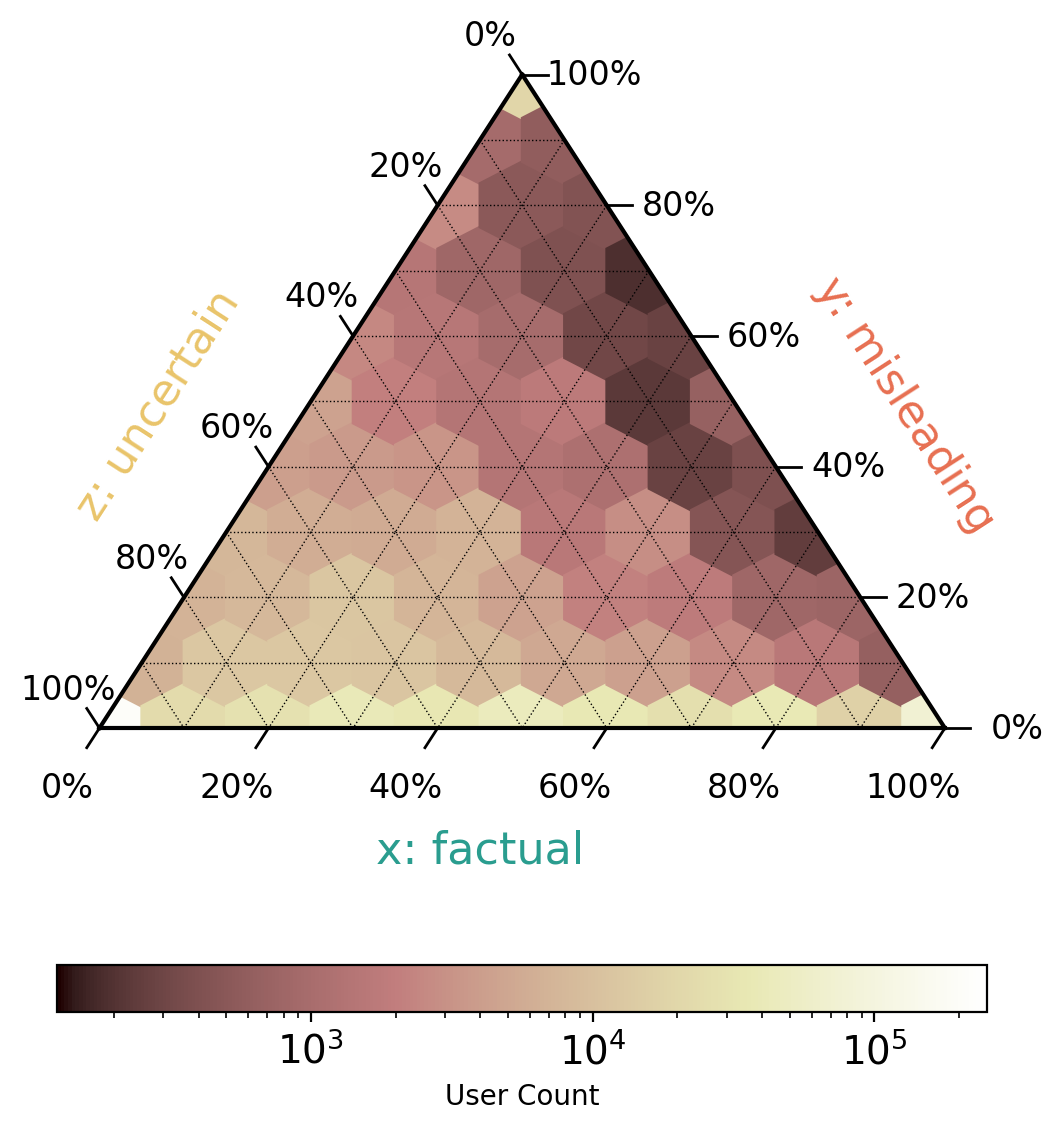

In [32]:
TenaryPlot(interp_dict, cmin = 10**2.1, cmax = 10**5.4, comps = ["x: factual","y: misleading","z: uncertain"], title = "Info Sent")

## 3.3. Cutting Line

In [33]:
retweetCategory_sum = [np.sum(all_newsCategoriesGeneralised == i) for i in range(3)]

In [34]:
def cal_retweet_volume_percent(index, tendency_ratio):
    node_list = [node for node, percent in node_CateogoriesPercent.items() if percent[index] >= tendency_ratio]
    edge_list = list(set(list(G_filtered.out_edges(node_list)) + list(G_filtered.in_edges(node_list))))
    
    count = 0
    for edge in edge_list:
        news_arr = G_filtered.edges[edge]['newsCategoriesGeneralised']
        count += np.sum(news_arr == index)

    return count/retweetCategory_sum[index]

In [35]:
tendency_ratio_arr = np.array([0.01*i for i in range(101)])

In [41]:
st = time.time()

scientific_volume_percent = np.array([cal_retweet_volume_percent(0, ratio) for ratio in tendency_ratio_arr])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 25.11685308218002 mins


In [42]:
st = time.time()

fake_volume_percent = np.array([cal_retweet_volume_percent(1, ratio) for ratio in tendency_ratio_arr])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 6.996716956297557 mins


In [43]:
st = time.time()

uncertain_volume_percent = np.array([cal_retweet_volume_percent(2, ratio) for ratio in tendency_ratio_arr])

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 38.08257375160853 mins


- Save results

In [60]:
results_arr = np.stack((scientific_volume_percent, fake_volume_percent, uncertain_volume_percent), axis = 1)

In [61]:
save_address = "results/User_categories/Cutting_line_plot.pkl"
with open(save_address, 'wb') as pickle_file:
    pickle.dump(results_arr, pickle_file)

- Load results

In [37]:
save = "results/User_categories/Cutting_line_plot.pkl"

with open(save, 'rb') as pickle_file:
    results_arr = pickle.load(pickle_file)

- Plot

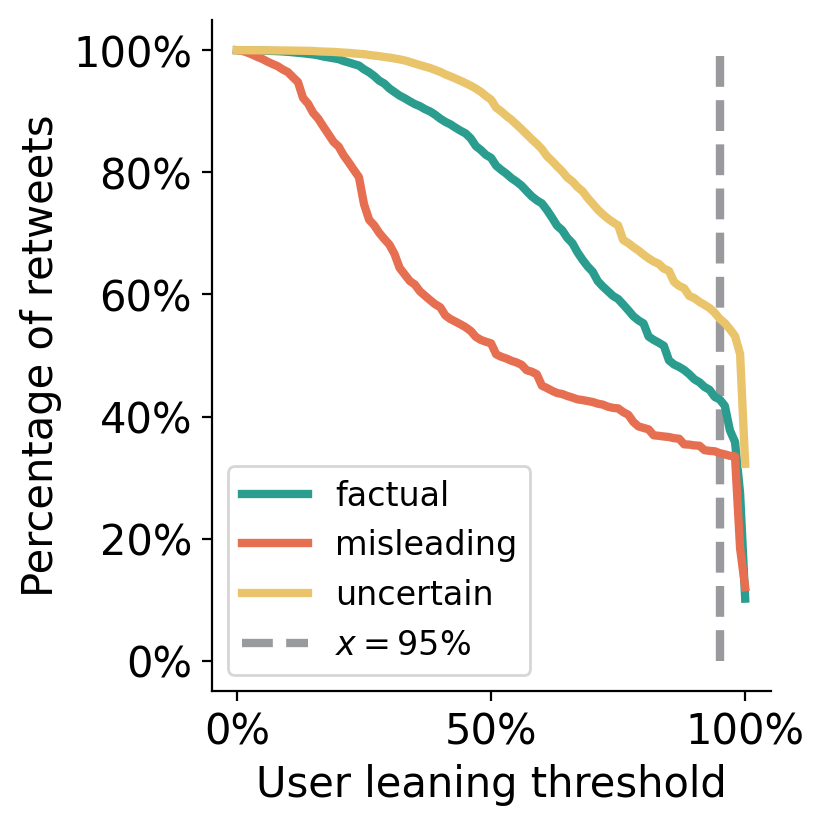

In [39]:
from matplotlib.ticker import PercentFormatter

tendency_ratio_arr = np.array([0.01*i for i in range(101)])

fig, axs = plt.subplots(figsize = (4, 4), constrained_layout = True)

plt.plot(tendency_ratio_arr, results_arr[:, 0], color = colour_palette["factual"], label = "factual", linewidth = 3, zorder = 1)
plt.plot(tendency_ratio_arr, results_arr[:, 1], color = colour_palette["misleading"], label = "misleading", linewidth = 3, zorder = 1)
plt.plot(tendency_ratio_arr, results_arr[:, 2], color = colour_palette["uncertain"], label = "uncertain", linewidth = 3, zorder = 1)

plt.plot(np.ones(11)*0.95, np.arange(0, 1.1, 0.1), label = r"$x = 95\%$", color = '#999A9E', linewidth = 3, zorder = 0, linestyle = "dashed")

plt.xlabel('User leaning threshold', fontsize = 15)
plt.ylabel('Percentage of retweets', fontsize = 15)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.grid()
plt.legend(fontsize = 12)

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

fig.savefig('Figures/fig2b.png', dpi=400, bbox_inches = 'tight')

In [40]:
cal_retweet_volume_percent(0, 0.95), cal_retweet_volume_percent(1, 0.95), cal_retweet_volume_percent(2, 0.95)

(0.4283057962584762, 0.3402477813306525, 0.5604402656045521)

## 3.4. Users of Extreme Leaning

In [44]:
scientificNodes_extreme = [node for node in list(G_filtered.nodes) if node_CateogoriesPercent[node][0] > 0.95]
fakeNodes_extreme = [node for node in list(G_filtered.nodes) if node_CateogoriesPercent[node][1] > 0.95]
uncertainNodes_extreme = [node for node in list(G_filtered.nodes) if node_CateogoriesPercent[node][2] > 0.95]

In [81]:
save_address = "results/User_categories/Users_extreme.pkl"
with open(save_address, 'wb') as pickle_file: 
    pickle.dump([scientificNodes_extreme, fakeNodes_extreme, uncertainNodes_extreme], pickle_file)

In [6]:
save_address = "results/User_categories/Users_extreme.pkl"
with open(save_address, 'rb') as f: 
    scientificNodes_extreme, fakeNodes_extreme, uncertainNodes_extreme = pickle.load(f)

In [5]:
def top_keys_from_candidates(d, candidates, top_n=10):
    # Filter candidates to include only those that are in the dictionary
    valid_candidates = [key for key in candidates if key in d]
    
    # Sort the valid candidates by the length of their lists in descending order
    sorted_candidates = sorted(valid_candidates, key=lambda k: len(d[k]), reverse=True)
    
    # Return the top_n candidates with the longest lists
    return sorted_candidates[:top_n]

In [6]:
retweetTimeStamps_dict = dict(nx.get_node_attributes(G_filtered, "timeStamps"))

In [530]:
top_keys_from_candidates(retweetTimeStamps_dict, scientificNodes_extreme, top_n=10)

[5406463,
 9454934,
 13644644,
 2856090,
 770324,
 1152969,
 770158,
 11581207,
 10676847,
 4556245]

In [531]:
top_keys_from_candidates(retweetTimeStamps_dict, fakeNodes_extreme, top_n=10)

[13919671,
 12877395,
 7464120,
 1630014,
 3588781,
 1068782,
 186940,
 4365621,
 1630383,
 1630135]

In [532]:
top_keys_from_candidates(retweetTimeStamps_dict, uncertainNodes_extreme, top_n=10)

[10268064,
 13238512,
 11753881,
 2292282,
 1629668,
 6348724,
 8130346,
 4049135,
 5338296,
 4872176]

In [7]:
len(scientificNodes_extreme), len(scientificNodes_extreme)/G_filtered.number_of_nodes()

(73048, 0.09516997523298065)

In [85]:
len(fakeNodes_extreme), len(fakeNodes_extreme)/G_filtered.number_of_nodes()

(19036, 0.024800893228220072)

In [86]:
len(uncertainNodes_extreme), len(uncertainNodes_extreme)/G_filtered.number_of_nodes()

(208806, 0.2720411489499748)

In [1]:
0.2720411489499748 + 0.09516997523298065 + 0.024800893228220072

0.39201201741117553

In [8]:
extreme_nodes_list = scientificNodes_extreme + fakeNodes_extreme + uncertainNodes_extreme
extremeAligning_list = ['scientific']*len(scientificNodes_extreme) + ['fake']*len(fakeNodes_extreme) + ['uncertain']*len(uncertainNodes_extreme)

extreme_aligning_dict = dict(zip(extreme_nodes_list, extremeAligning_list))

nonextreme_nodes_list = list(set(list(G_filtered.nodes)) - set(extreme_nodes_list))
extreme_aligning_dict.update(dict(zip(nonextreme_nodes_list, ['NA']*len(nonextreme_nodes_list))))

In [9]:
nx.set_node_attributes(G_filtered, extreme_aligning_dict, name = "extreme_aligning")

In [ ]:
with open('data/graphs/G_filtered.gpickle', 'wb') as f:
    pickle.dump(G_filtered, f)

## 3.5. Persistent Users

In [219]:
def get_persistent_nodes(latest_start, earliest_end, nodes):
    
    persistent_nodes = []
    
    for node in nodes:
        if G_filtered.nodes[node]["timeStamps"][0] <= latest_start and G_filtered.nodes[node]["timeStamps"][-1] >= earliest_end:
            persistent_nodes.append(node)
        
    return persistent_nodes

In [214]:
days_in_month = [
    31,  # March
    30,  # April
    31,  # May
    30,  # June
    31,  # July
    31,  # August
    30,  # September
    31,  # October
    30,  # November
    31,   # December
    31,  # January
    28,  # February (29 in leap years)
]

In [215]:
monthly_separators = []
for i in range(12*3):
    if i == 0:
        monthly_separators.append(1584482894)
    else:
        monthly_separators.append((60*60*24) * days_in_month[i%12] + monthly_separators[-1])

In [216]:
latest_start = monthly_separators[3]; earliest_end = monthly_separators[-4]

In [220]:
scientificNodes_persistent = get_persistent_nodes(latest_start, earliest_end, scientificNodes_extreme)
len(scientificNodes_persistent), len(scientificNodes_persistent)/len(scientificNodes_extreme)

(8840, 0.12101631803745483)

In [221]:
fakeNodes_persistent = get_persistent_nodes(latest_start, earliest_end, fakeNodes_extreme)
len(fakeNodes_persistent), len(fakeNodes_persistent)/len(fakeNodes_extreme)

(1399, 0.07349233032149612)

In [222]:
uncertainNodes_persistent = get_persistent_nodes(latest_start, earliest_end, uncertainNodes_extreme)
len(uncertainNodes_persistent), len(uncertainNodes_persistent)/len(uncertainNodes_extreme)

(19254, 0.09220999396569064)

## 4. Retweets of Extremely Aligned Users

In [45]:
def get_temporal_RetweetCountSum(nodes, time_separators):
    
    interval_list = list(zip(time_separators[:-1], time_separators[1:]))
    temporal_retweet_count = np.zeros(len(interval_list))
    
    in_edges = list(G_filtered.in_edges(nodes))
    out_edges = list(G_filtered.out_edges(nodes))
    
    timestamps = []
    for edge in list(set(in_edges + out_edges)):
        timestamps += list(np.array(G_filtered.edges[edge]["timeStamps"]))
    timestamps = np.array(timestamps)
    
    for i in range(len(interval_list)):
        bool_arr = np.logical_and(timestamps >= interval_list[i][0], timestamps <= interval_list[i][1])
        temporal_retweet_count[i] += np.sum(bool_arr) 
    
    return temporal_retweet_count

In [46]:
separators = [1584482894 + (i+1) * (60*60*24) for i in range(1062)] #daily

In [47]:
st = time.time()

scientificNodes_retweetCountSum = get_temporal_RetweetCountSum(scientificNodes_extreme, separators)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.2494303305943807 mins
RAM memory % used: 6.3
RAM Used (GB): 22.55847424


In [48]:
st = time.time()

fakeNodes_retweetCountSum = get_temporal_RetweetCountSum(fakeNodes_extreme, separators)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.04371920426686605 mins
RAM memory % used: 6.3
RAM Used (GB): 22.559633408


In [49]:
st = time.time()

uncertainNodes_retweetCountSum = get_temporal_RetweetCountSum(uncertainNodes_extreme, separators)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 0.5679042379061381 mins
RAM memory % used: 6.3
RAM Used (GB): 22.568022016


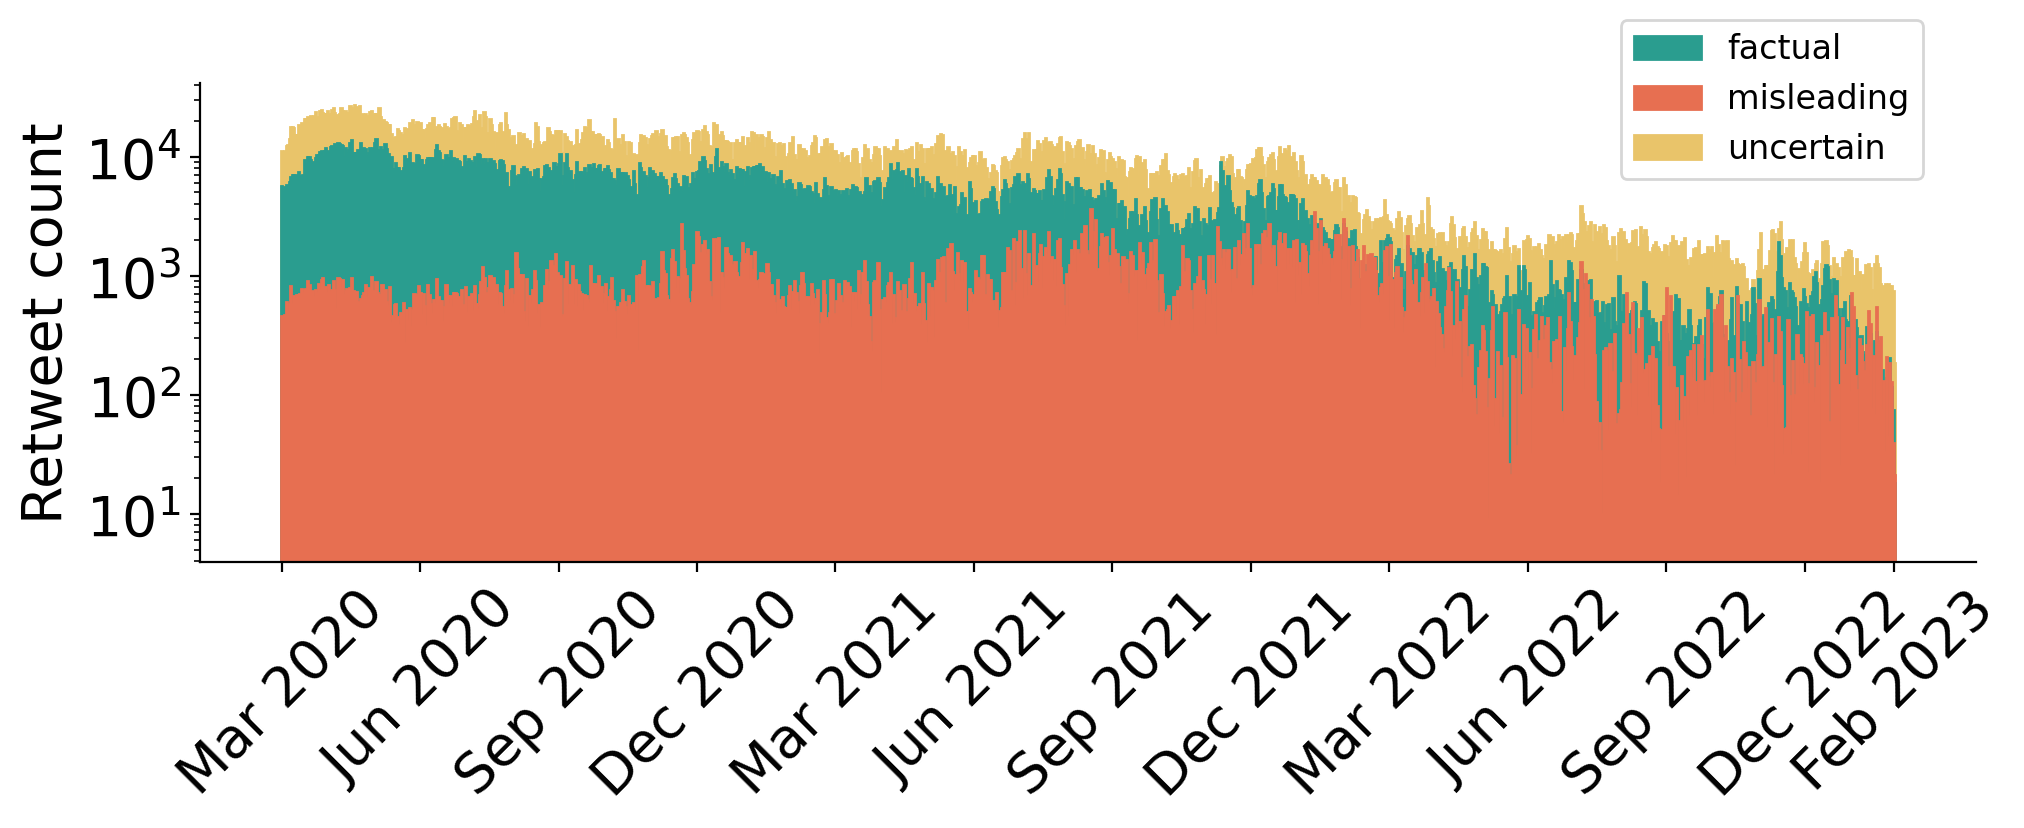

In [56]:
fig, axs = plt.subplots(figsize = (10,4), constrained_layout = True)

x = np.arange(0, len(separators)-1, 1)
plt.bar(x, uncertainNodes_retweetCountSum, color = colour_palette["uncertain"], edgecolor = colour_palette["uncertain"], linewidth = 1, alpha = 1, label = "uncertain")
plt.bar(x, scientificNodes_retweetCountSum, color = colour_palette["factual"], edgecolor = colour_palette["factual"], linewidth = 1, alpha = 1, label = "factual")
plt.bar(x, fakeNodes_retweetCountSum, color = colour_palette["misleading"], edgecolor = colour_palette["misleading"], linewidth = 1, alpha = 1, label = "misleading")
plt.yscale('log')

index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.ylabel('Retweet count', fontsize = 20)

axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

#plt.plot(2*[183], [10**1, 10**5], c = "k", linestyle = "--", linewidth = 0.8) # 1M global death
#plt.plot(2*[269], [10**1, 10**5], c = "k", linestyle = "--", linewidth = 0.8) # vaccine roll out
#plt.plot(2*[621], [10**1, 10**5], c = "k", linestyle = "--", linewidth = 0.8) # avg 1 dose vaccine
#plt.plot(2*[644], [10**1, 10**5], c = "k", linestyle = "--", linewidth = 0.8) # delta variant 
#plt.plot(2*[679], [10**1, 10**5], c = "k", linestyle = "--", linewidth = 0.8) # omicron variant

plt.legend(*([ x[i] for i in [1,2,0] ] for x in plt.gca().get_legend_handles_labels()), fontsize = 12, loc=(0.8, 0.8))

fig.savefig('figures/fig3a.png', dpi=400, bbox_inches = 'tight')

# 5. Followers of Extremely Aligned Users

## 5.1. Distribution of followers at initial state

In [57]:
def get_initialFollowerCount(nodes):
    
    followerCount_arr = np.array([G_filtered.nodes[node]["followers"][0] for node in nodes])
        
    return followerCount_arr

In [58]:
fakeNodes_initialFollowerCount = get_initialFollowerCount(fakeNodes_extreme)
scientificNodes_initialFollowerCount = get_initialFollowerCount(scientificNodes_extreme)
uncertainNodes_initialFollowerCount = get_initialFollowerCount(uncertainNodes_extreme)

In [59]:
np.sum(fakeNodes_initialFollowerCount), np.sum(scientificNodes_initialFollowerCount), np.sum(uncertainNodes_initialFollowerCount)

(43607655, 929913833, 3014029803)

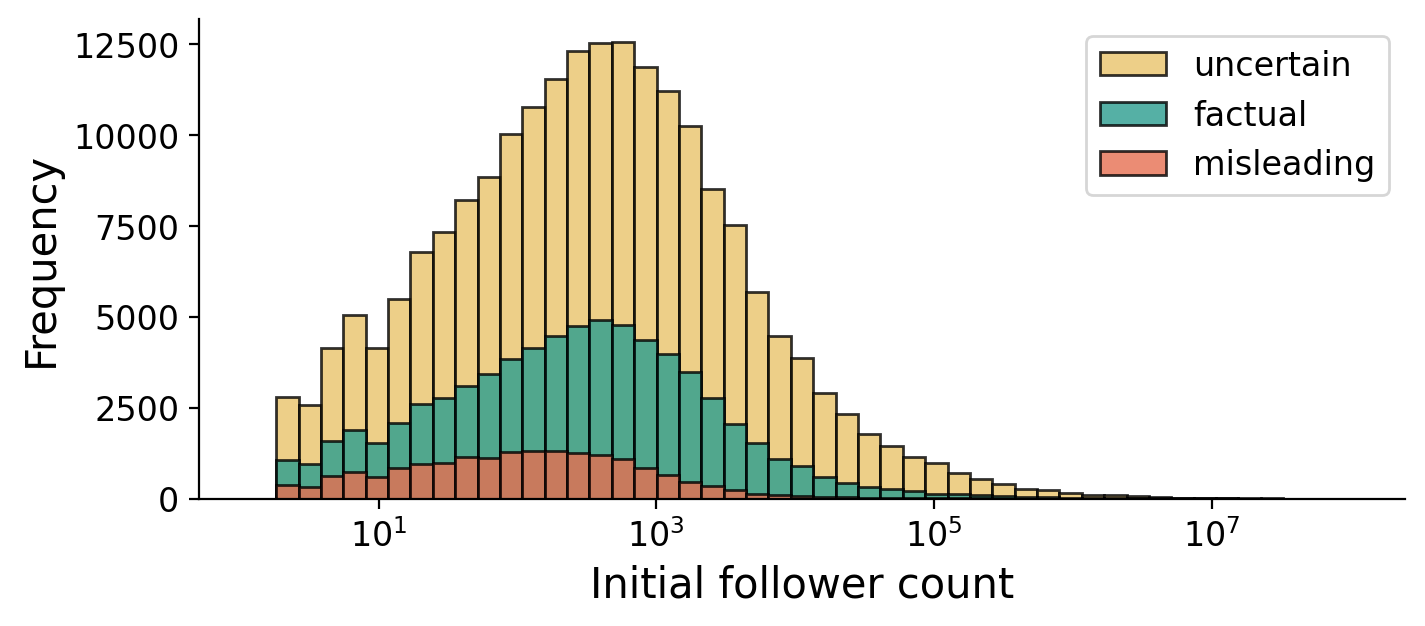

In [60]:
fig, axs = plt.subplots(figsize = (7, 3), constrained_layout = True)

plt.hist(uncertainNodes_initialFollowerCount, bins = np.logspace(0.1, 8, 50), alpha = 0.8, color = colour_palette["uncertain"], label = "uncertain", edgecolor='black')
plt.hist(scientificNodes_initialFollowerCount, bins = np.logspace(0.1, 8, 50), alpha = 0.8, color = colour_palette["factual"], label = "factual", edgecolor='black')
plt.hist(fakeNodes_initialFollowerCount, bins = np.logspace(0.1, 8, 50), alpha = 0.8, color = colour_palette["misleading"], label = "misleading", edgecolor='black')

plt.xscale('log'); 
#plt.yscale('log')

plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)

plt.xlabel("Initial follower count", fontsize = 15); plt.ylabel("Frequency", fontsize = 15)
plt.legend(fontsize = 12)

axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)

fig.savefig('figures/SM_fig7.png', dpi=400, bbox_inches = 'tight')

## 5.2. Sliding Windows

In [61]:
def get_window_followerCountIncrease(nodes, time_start, time_end):
    
    followerCountSum_start = 0
    followerCountSum_end = 0
    
    for node in nodes:
        bool_arr1 = (np.array(G_filtered.nodes[node]['timeStamps']) >= time_start)
        bool_arr2 = (np.array(G_filtered.nodes[node]['timeStamps']) <= time_end)
        bool_arr = np.logical_and(bool_arr1, bool_arr2)
        if np.sum(bool_arr) > 1: 
            start = np.array(G_filtered.nodes[node]["followers"])[bool_arr][0]
            end = np.array(G_filtered.nodes[node]["followers"])[bool_arr][-1]
            
            followerCountSum_start += start
            followerCountSum_end += end
    
    return followerCountSum_end/followerCountSum_start - 1

In [62]:
def get_allWindows_followerCountIncrease(nodes, windows):
    
    temporal_followerCountIncrease = np.zeros(len(windows))
    
    for i in range(len(windows)):
        temporal_followerCountIncrease[i] = get_window_followerCountIncrease(nodes, windows[i][0], windows[i][1])
    
    return temporal_followerCountIncrease

In [63]:
def calculate_days_2nd_17th(start_date_str, end_date_str):
    # Convert input strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # Initialize an empty list to store the results
    days_count_list = []
    
    # Initialize current date to the start date
    current_date = start_date
    
    # Iterate over each month's 2nd and 17th until reaching the end date
    while current_date < end_date:
        # Add the 2nd of the current month if it's greater than or equal to the start date
        second_of_month = current_date.replace(day=2)
        if second_of_month >= start_date and second_of_month < end_date:
            days_count = (second_of_month - start_date).days
            days_count_list.append((second_of_month.strftime("%Y-%m-%d"), days_count))
        
        # Add the 17th of the current month if it's greater than or equal to the start date
        seventeenth_of_month = current_date.replace(day=17)
        if seventeenth_of_month >= start_date and seventeenth_of_month < end_date:
            days_count = (seventeenth_of_month - start_date).days
            days_count_list.append((seventeenth_of_month.strftime("%Y-%m-%d"), days_count))
        
        # Move to the next month
        if current_date.month == 12:  # Handle December to January transition
            current_date = current_date.replace(year=current_date.year + 1, month=1)
        else:
            current_date = current_date.replace(month=current_date.month + 1)
    
    return days_count_list

In [64]:
day_counter_pair = calculate_days_2nd_17th("2020-03-17", "2023-02-18")
day_counter = np.array([day_counter_pair[i][1] for i in range(len(day_counter_pair))])
monthly_separators = 1584482894 + (60*60*24) * day_counter
monthly_slidingWindows = np.array(list(zip(monthly_separators[:-2], monthly_separators[2:])))

thirtyDays_separators = 1584482894 + (60*60*24) * np.arange(0, 1062, 15)
thirtyDays_slidingWindows = np.array(list(zip(thirtyDays_separators[:-2], thirtyDays_separators[2:])))

In [65]:
len(monthly_slidingWindows)

69

In [66]:
st = time.time()

fakeNodes_followerCountIncrease = get_allWindows_followerCountIncrease(fakeNodes_extreme, monthly_slidingWindows)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 0.24742661317189535 mins


In [67]:
st = time.time()

scientificNodes_followerCountIncrease = get_allWindows_followerCountIncrease(scientificNodes_extreme, monthly_slidingWindows)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 0.9971075574556987 mins


In [68]:
st = time.time()

uncertainNodes_followerCountIncrease = get_allWindows_followerCountIncrease(uncertainNodes_extreme, monthly_slidingWindows)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')

Execution time: 2.720022956530253 mins


In [69]:
def poly_reg(x, y, degree=3):
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    
    # Generate std
    y_pred = poly(x)
    residuals = y - y_pred
    std_dev = np.std(residuals)

    # Generate x values for plotting the polynomial curve
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = poly(x_fit)

    return x_fit, y_fit, std_dev

In [70]:
import math

def boxcar_smoothing(arr, n):
    index = np.arange(0, len(arr), 1)[n:(-n)]
    smooth_arr = [np.average(arr[i-n: i+n+1: 1]) for i in index]
                
    return smooth_arr

In [71]:
day_counter[:-2] + 15

array([  15,   31,   46,   61,   76,   92,  107,  122,  137,  153,  168,
        184,  199,  214,  229,  245,  260,  275,  290,  306,  321,  337,
        352,  365,  380,  396,  411,  426,  441,  457,  472,  487,  502,
        518,  533,  549,  564,  579,  594,  610,  625,  640,  655,  671,
        686,  702,  717,  730,  745,  761,  776,  791,  806,  822,  837,
        852,  867,  883,  898,  914,  929,  944,  959,  975,  990, 1005,
       1020, 1036, 1051])

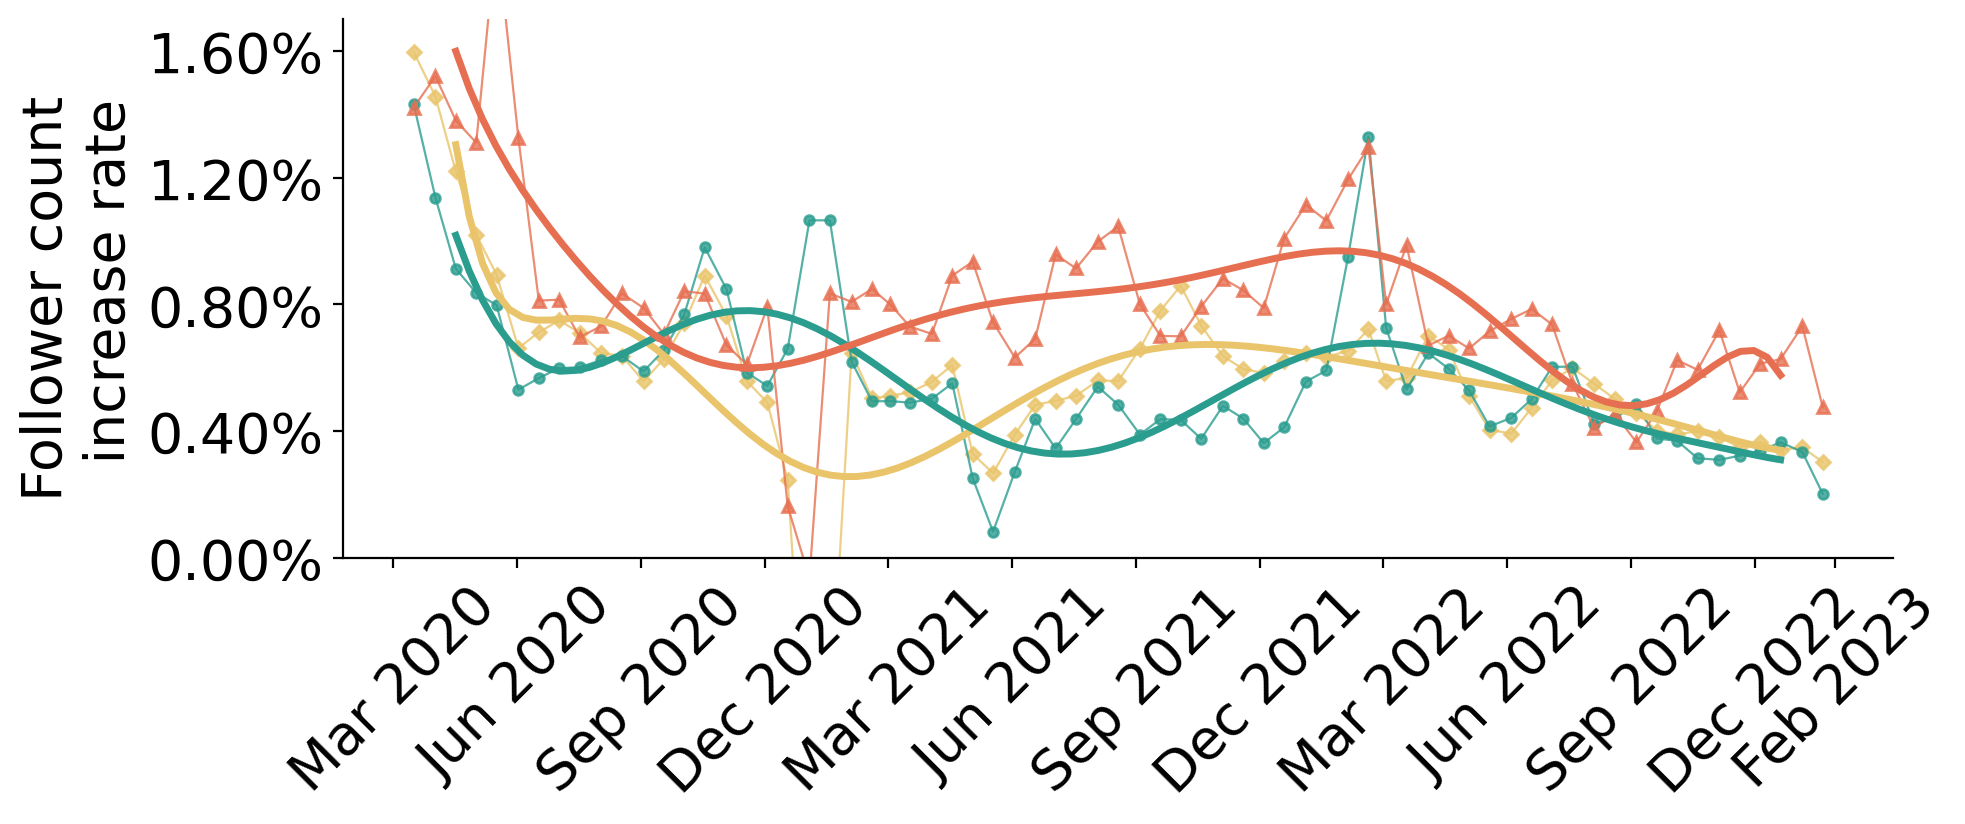

In [74]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import PercentFormatter

colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

fig, axs = plt.subplots(figsize = (10, 3.5))

x = day_counter[:-2] + 15
plt.plot(x, uncertainNodes_followerCountIncrease, '-D', c = colour_palette["uncertain"], markersize = 3.5, linewidth = 0.8, alpha = 0.8)
plt.plot(x, scientificNodes_followerCountIncrease, '-o', c = colour_palette["scientific"], markersize = 3.5, linewidth = 0.8, alpha = 0.8)
plt.plot(x, fakeNodes_followerCountIncrease, '-^', c = colour_palette["fake"], markersize = 4, linewidth = 0.8, alpha = 0.8)

n = 2

x = x[n:(-n)]
uncertainNodes_followerCountIncrease_smooth = boxcar_smoothing(uncertainNodes_followerCountIncrease, n)
scientificNodes_followerCountIncrease_smooth = boxcar_smoothing(scientificNodes_followerCountIncrease, n)
fakeNodes_followerCountIncrease_smooth = boxcar_smoothing(fakeNodes_followerCountIncrease, n)

n = 10
x_fit, uncertainNodes_followerCountIncrease_reg, uncertain_std = poly_reg(x, uncertainNodes_followerCountIncrease_smooth, n)
x_fit, scientificNodes_followerCountIncrease_reg, scientific_std = poly_reg(x, scientificNodes_followerCountIncrease_smooth, n)
x_fit, fakeNodes_followerCountIncrease_reg, fake_std = poly_reg(x, fakeNodes_followerCountIncrease_smooth, n)

plt.plot(x_fit, uncertainNodes_followerCountIncrease_reg, c = colour_palette["uncertain"], linewidth = 2.5)
plt.plot(x_fit, scientificNodes_followerCountIncrease_reg, c = colour_palette["scientific"], linewidth = 2.5)
plt.plot(x_fit, fakeNodes_followerCountIncrease_reg, c = colour_palette["fake"], linewidth = 2.5)

index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
plt.xticks(index, x_tick, fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
plt.ylabel('Retweet count', fontsize = 20)

plt.ylabel('Follower count \n increase rate', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#plt.plot(2*[x[6]], [0.000, 0.017], c = "k", linestyle = "--", linewidth = 0.8) # 1M global death
#plt.plot(2*[x[16]], [0.000, 0.017], c = "k", linestyle = "--", linewidth = 0.8) # 1M global death
#plt.plot(2*[x[22]], [0.000, 0.017], c = "k", linestyle = "--", linewidth = 0.8) # vaccine roll out
#plt.plot(2*[x[43]], [0.000, 0.017], c = "k", linestyle = "--", linewidth = 0.8) # avg 1 dose vaccine
#plt.plot(2*[x[49]], [0.000, 0.017], c = "k", linestyle = "--", linewidth = 0.8) # avg 1 dose vaccine

plt.ylim(0.000, 0.017)
axs.yaxis.set_major_locator(MaxNLocator(nbins=5))

#plt.fill_between([214 - 30, 365], - 0.015, 0.025, alpha = 0.2, color = 'grey', edgecolor = 'white')
#plt.fill_between([214 + 365 + 31, 365 + 61 +365], -0.015, 0.025, alpha = 0.2, color = 'grey', edgecolor = 'white')

fig.savefig('figures/fig3b.png', dpi=400, bbox_inches = 'tight')

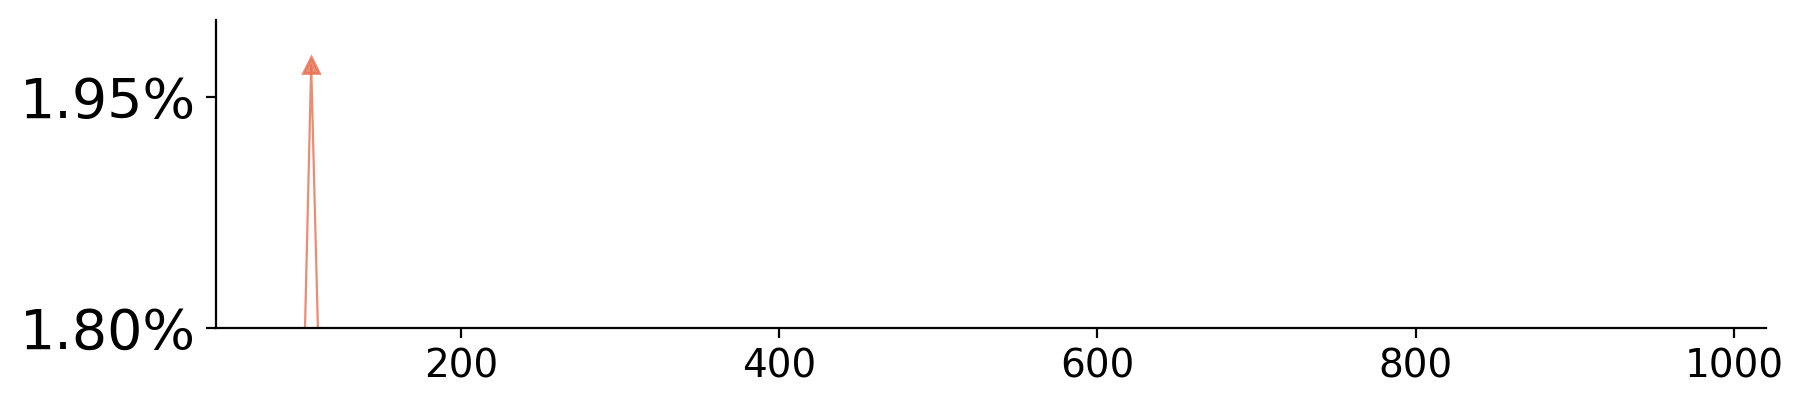

In [75]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter

colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

fig, axs = plt.subplots(figsize = (10, 2))

x = day_counter[:-2] + 15
plt.plot(x+30, uncertainNodes_followerCountIncrease, '-D', c = colour_palette["uncertain"], markersize = 5, linewidth = 0.8, alpha = 0.8)
plt.plot(x+30, scientificNodes_followerCountIncrease, '-o', c = colour_palette["scientific"], markersize = 5, linewidth = 0.8, alpha = 0.8)
plt.plot(x+30, fakeNodes_followerCountIncrease, '-^', c = colour_palette["fake"], markersize = 6, linewidth = 0.8, alpha = 0.8)

n = 2

x = x[n:(-n)]
uncertainNodes_followerCountIncrease_smooth = boxcar_smoothing(uncertainNodes_followerCountIncrease, n)
scientificNodes_followerCountIncrease_smooth = boxcar_smoothing(scientificNodes_followerCountIncrease, n)
fakeNodes_followerCountIncrease_smooth = boxcar_smoothing(fakeNodes_followerCountIncrease, n)

n = 10
x_fit, uncertainNodes_followerCountIncrease_reg, uncertain_std = poly_reg(x, uncertainNodes_followerCountIncrease_smooth, n)
x_fit, scientificNodes_followerCountIncrease_reg, scientific_std = poly_reg(x, scientificNodes_followerCountIncrease_smooth, n)
x_fit, fakeNodes_followerCountIncrease_reg, fake_std = poly_reg(x, fakeNodes_followerCountIncrease_smooth, n)

plt.plot(x_fit, uncertainNodes_followerCountIncrease_reg, c = colour_palette["uncertain"], linewidth = 2.5)
plt.plot(x_fit, scientificNodes_followerCountIncrease_reg, c = colour_palette["scientific"], linewidth = 2.5)
plt.plot(x_fit, fakeNodes_followerCountIncrease_reg, c = colour_palette["fake"], linewidth = 2.5)

#index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
#x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
#plt.xticks(index, []*len(index), fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
#plt.ylabel('Retweet count', fontsize = 20)

#plt.ylabel('Follower count \n increase rate', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['top'].set_visible(False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=2))

plt.xlim(min(x), max(x))
plt.ylim(0.018, 0.02)
axs.yaxis.set_major_locator(MaxNLocator(nbins=2))

#plt.fill_between([214 - 30, 365], - 0.015, 0.025, alpha = 0.2, color = 'grey', edgecolor = 'white')
#plt.fill_between([214 + 365 + 31, 365 + 61 +365], -0.015, 0.025, alpha = 0.2, color = 'grey', edgecolor = 'white')

fig.savefig('figures/figure3b1.png', dpi=400, bbox_inches = 'tight')

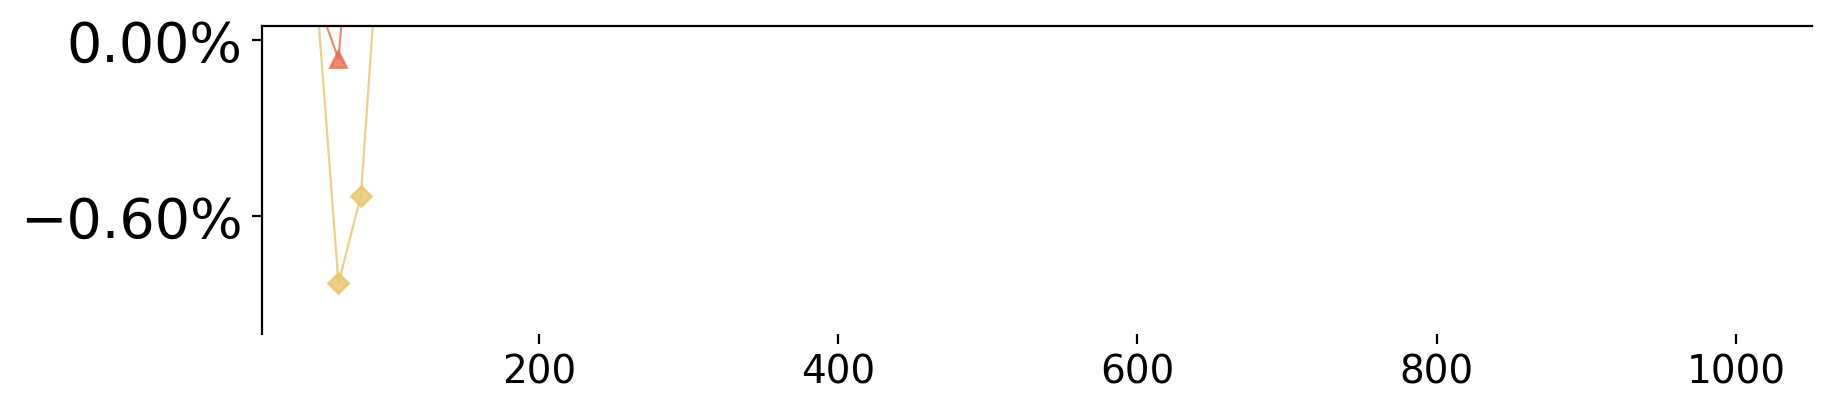

In [76]:
colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

fig, axs = plt.subplots(figsize = (10, 2))

x = day_counter[:-2] + 15
plt.plot(x-240, uncertainNodes_followerCountIncrease, '-D', c = colour_palette["uncertain"], markersize = 5, linewidth = 0.8, alpha = 0.8)
plt.plot(x-240, scientificNodes_followerCountIncrease, '-o', c = colour_palette["scientific"], markersize = 5, linewidth = 0.8, alpha = 0.8)
plt.plot(x-240, fakeNodes_followerCountIncrease, '-^', c = colour_palette["fake"], markersize = 6, linewidth = 0.8, alpha = 0.8)

#index = [i*91 for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]] + [91*11 + 59]
#x_tick = ["Mar 2020", "Jun 2020", "Sep 2020", "Dec 2020", "Mar 2021", "Jun 2021", "Sep 2021", "Dec 2021", "Mar 2022", "Jun 2022", "Sep 2022", "Dec 2022", "Feb 2023"]
#plt.xticks(index, []*len(index), fontsize = 20, rotation = 45) 
plt.yticks(fontsize = 20)
#plt.ylabel('Retweet count', fontsize = 20)

#plt.ylabel('Follower count \n increase rate', fontsize = 20)
axs.spines['right'].set_visible(False); axs.spines['bottom'].set_visible(False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=2))

plt.xlim(min(x), max(x))
plt.ylim(-0.01, 0.0005)
axs.yaxis.set_major_locator(MaxNLocator(nbins=2))

fig.savefig('figures/figure3b2.png', dpi=400, bbox_inches = 'tight')